Hey it's Kim.
This uses WEB API and Vader sentimental analysis
I think Wei wanted the date by date analysis so I added date on the function.
Things I am worried about is

1. How am I going to put 'APPL'or 'GOOGL' into 'Apple' and 'Google'??
 because Newsapi finds by using the company name

2. Should I turn this in to data frame of
Column = [Keyword, Newstitle, URL, Sentiments??]

let me know what u think on Instagram


In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.0 MB/s 


In [29]:
  import pandas as pd
  import requests
  import json
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
  import matplotlib.pyplot as plt

# Elvira's version start

In [4]:
def create_url(keyword):
 
    API = '668b3afed7964ff4bba962c15faa74ec'
    url = 'https://newsapi.org/v2/everything?'
    parameter = {'q' : keyword,# topic 
              'apiKey': API,
              'sortBy':'popularity'
              }

    news_api = requests.get(url,params=parameter)

    return (news_api.json())

In [5]:
def df_from_api(company_list):
  df = pd.DataFrame(columns = ['title', 'keyword', 'date', 'link', "sentiment_score"])

  # to make sure that the tweets we see are connected with APPL as a stock 
  for i in range(len(company_list)):
    company_list[i] = company_list[i] + " AND " + "stock"

  # compund sentiment_score per stock
  compund_sentiment_per_stock = {}

  for i in company_list:
    newses = create_url(i)
    for news in newses['articles']:
      stock = i.split(" ")[0]
      sid_obj = SentimentIntensityAnalyzer()
      sentiment_dict = sid_obj.polarity_scores(news['content'])
      score = sentiment_dict['compound']
      title = news['title']
      url = news['url']
      date = news['publishedAt']
      row = [title, stock, date, url, sentiment_dict["compound"]]
      df.loc[len(df.index)] = row

    stock_df = df.loc[df['keyword'] == stock]
    compund_sentiment_per_stock[stock] = round(stock_df["sentiment_score"].mean(), 3)

  print(compund_sentiment_per_stock)
  
  return df

data = df_from_api(["APPL", "GOOG", "AMZN", "META", "IBM"])

{'APPL': 0.054, 'GOOG': 0.165, 'AMZN': 0.18, 'META': 0.165, 'IBM': 0.2}


In [6]:
data

,title,keyword,date,link,sentiment_score
0,China COVID lockdowns: Here's what Wall Street...,APPL,2022-11-29T10:45:30Z,https://finance.yahoo.com/news/china-covid-loc...,0.0516
1,Top 10 Healthcare Industry Predictions For 2023,APPL,2022-11-07T12:00:00Z,https://www.forbes.com/sites/sachinjain/2022/1...,0.0000
2,Structural insights into the contactin 1 – neu...,APPL,2022-11-03T00:00:00Z,https://www.nature.com/articles/s41467-022-343...,0.0000
3,Stock Market Today: Apple Leads Nasdaq Lower A...,APPL,2022-11-28T21:16:34Z,https://www.ibtimes.com/stock-market-today-app...,0.1779
4,Effectiveness of formaldehyde in various soil ...,APPL,2022-11-18T14:00:00Z,https://journals.plos.org/plosone/article?id=1...,0.1779
...,...,...,...,...,...
416,Kyndryl Reports Second Quarter 2023 Results,IBM,2022-11-02T20:24:44Z,https://www.businesswire.com/news/home/2022110...,0.0000
417,Johnson & Johnson Names CEO Joaquin Duato as C...,IBM,2022-11-30T22:06:31Z,https://www.businesswire.com/news/home/2022113...,0.0000
418,SolarWinds Announces Third Quarter 2022 Results,IBM,2022-11-03T11:36:25Z,https://www.businesswire.com/news/home/2022110...,0.6369
419,OurCrowd to Celebrate $2 Billion Commitments L...,IBM,2022-11-09T06:06:54Z,https://www.businesswire.com/news/home/2022110...,0.4576


# Elvira's version end

In [7]:
#2 recent news

def get_sentiment(company_name):
  import pandas as pd
  import requests
  import json
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
  
  df = pd.DataFrame(columns = ['company_name', 'title', 'date', 'url','sentiment'])

  API = '668b3afed7964ff4bba962c15faa74ec'
  url = 'https://newsapi.org/v2/everything?'
  parameter = {'q' : company_name,# topic 
            'apiKey': API,
   #         'from': from_date,
   #         'to':to_date,
            'sortBy':'popularity', 
            'pageSize': '10'
            }
  news_api = requests.get(url,params=parameter).json()
  for i in news_api['articles']:
      sid_obj = SentimentIntensityAnalyzer()
      sentiment_dict = sid_obj.polarity_scores(i['content'])

      score = sentiment_dict['compound']
      title = i['title']
      url = i['url']
      date = i['publishedAt']

      df = df.append({'company_name': company_name, 'title': title, 'date' : date, 'url':url, 'sentiment': score},ignore_index=True)
  
  return df

In [8]:
get_sentiment('APPL')

,company_name,title,date,url,sentiment
0,APPL,Eighty Years of the Finite Element Method: Bir...,2022-11-05T12:31:50Z,https://link.springer.com/article/10.1007/s118...,-0.1027
1,APPL,Intermittent fasting protects against Alzheime...,2022-11-19T04:39:17Z,https://www.nature.com/articles/s43587-022-003...,-0.4404
2,APPL,Social isolation and the brain in the pandemic...,2022-11-13T15:31:07Z,https://www.nature.com/articles/s41562-022-014...,-0.7650
3,APPL,Psychological and Psychiatric Terms to Avoid,2022-11-16T14:56:20Z,https://www.frontiersin.org/articles/10.3389/f...,0.7717
4,APPL,Cumulative polarization in conductive interfac...,2022-11-09T00:00:00Z,https://www.nature.com/articles/s41586-022-053...,0.0000
5,APPL,Coherent surface plasmon polariton amplificati...,2022-11-02T00:00:00Z,https://www.nature.com/articles/s41586-022-052...,0.0000
6,APPL,Shedding light on declines in diversity of gra...,2022-11-02T00:00:00Z,https://www.nature.com/articles/d41586-022-034...,0.0000
7,APPL,Integrated femtosecond pulse generator on thin...,2022-11-16T00:00:00Z,https://www.nature.com/articles/s41586-022-053...,0.0000
8,APPL,THP9 enhances seed protein content and nitroge...,2022-11-16T00:00:00Z,https://www.nature.com/articles/s41586-022-054...,0.0000
9,APPL,Separating water isotopologues using diffusion...,2022-11-09T00:00:00Z,https://www.nature.com/articles/s41586-022-053...,0.0000


In [9]:
get_sentiment('IBM')

,company_name,title,date,url,sentiment
0,IBM,Hyperkin is reviving the Xbox 360's iconic con...,2022-11-22T19:16:29Z,https://www.engadget.com/hyperkin-xenon-contro...,0.2960
1,IBM,The Morning After: UK competition regulator in...,2022-11-23T12:15:45Z,https://www.engadget.com/the-morning-after-uk-...,0.0258
2,IBM,The High-Temperature Superconductivity Mystery...,2022-11-27T13:00:00Z,https://www.wired.com/story/the-high-temperatu...,0.4019
3,IBM,"A history of ARM, part 2: Everything starts to...",2022-11-21T12:00:12Z,https://arstechnica.com/gadgets/2022/11/a-hist...,0.0000
4,IBM,"Maersk, IBM discontinue shipping blockchain pl...",2022-11-29T16:19:00Z,https://www.reuters.com/technology/maersk-ibm-...,0.0000
5,IBM,Germany's Bosch partners with IBM in quantum c...,2022-11-09T09:04:00Z,https://www.reuters.com/technology/germanys-bo...,0.7579
6,IBM,IBM launches its most powerful quantum compute...,2022-11-09T14:07:00Z,https://www.reuters.com/technology/ibm-launche...,0.5984
7,IBM,The Secret Genius of Modern Life review – irre...,2022-11-10T21:01:00Z,https://www.theguardian.com/tv-and-radio/2022/...,0.6486
8,IBM,Ireland has raked in billions from tech giants...,2022-11-12T16:00:45Z,https://www.theguardian.com/commentisfree/2022...,0.2263
9,IBM,Model Mainfraime,2022-11-25T16:00:00Z,https://makezine.com/article/craft/fine-art/mo...,0.1027


In [10]:
def get_companies(companies):
  import pandas as pd
  p = []
  df = pd.DataFrame()
  compound_sentiment_per_stock = {}
  for i in companies:

    df = pd.concat([df, get_sentiment(i)])
      
    
  return df
  
get_companies(['IBM','Apple','AMZN'])
  


,company_name,title,date,url,sentiment
0,IBM,Hyperkin is reviving the Xbox 360's iconic con...,2022-11-22T19:16:29Z,https://www.engadget.com/hyperkin-xenon-contro...,0.2960
1,IBM,The Morning After: UK competition regulator in...,2022-11-23T12:15:45Z,https://www.engadget.com/the-morning-after-uk-...,0.0258
2,IBM,The High-Temperature Superconductivity Mystery...,2022-11-27T13:00:00Z,https://www.wired.com/story/the-high-temperatu...,0.4019
3,IBM,"A history of ARM, part 2: Everything starts to...",2022-11-21T12:00:12Z,https://arstechnica.com/gadgets/2022/11/a-hist...,0.0000
4,IBM,"Maersk, IBM discontinue shipping blockchain pl...",2022-11-29T16:19:00Z,https://www.reuters.com/technology/maersk-ibm-...,0.0000
5,IBM,Germany's Bosch partners with IBM in quantum c...,2022-11-09T09:04:00Z,https://www.reuters.com/technology/germanys-bo...,0.7579
6,IBM,IBM launches its most powerful quantum compute...,2022-11-09T14:07:00Z,https://www.reuters.com/technology/ibm-launche...,0.5984
7,IBM,The Secret Genius of Modern Life review – irre...,2022-11-10T21:01:00Z,https://www.theguardian.com/tv-and-radio/2022/...,0.6486
8,IBM,Ireland has raked in billions from tech giants...,2022-11-12T16:00:45Z,https://www.theguardian.com/commentisfree/2022...,0.2263
9,IBM,Model Mainfraime,2022-11-25T16:00:00Z,https://makezine.com/article/craft/fine-art/mo...,0.1027


# Financial martket analysis (attempt)

In [27]:
def create_url(keyword):
 
    API = '668b3afed7964ff4bba962c15faa74ec'
    url = 'https://newsapi.org/v2/everything?'
    parameter = {'q' : keyword,# topic 
              'apiKey': API,
              'sortBy':'publishedAt'
              }

    news_api = requests.get(url,params=parameter)

    return news_api.json()

In [35]:

df = pd.DataFrame(columns = ["date", "sentiment_score"])

newses = create_url("finance OR financial market OR stock")

for news in newses['articles']:
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(news['content'])
  score = sentiment_dict['compound']
  date = news['publishedAt']
  row = [date, sentiment_dict["compound"]]
  df.loc[len(df.index)] = row
df


,date,sentiment_score
0,2022-12-02T18:09:01Z,0.0000
1,2022-12-02T18:07:59Z,0.4215
2,2022-12-02T18:07:23Z,-0.2960
3,2022-12-02T18:06:41Z,0.6808
4,2022-12-02T18:06:04Z,0.5927
...,...,...
95,2022-12-02T17:49:44Z,0.8591
96,2022-12-02T17:49:43Z,0.2263
97,2022-12-02T17:48:52Z,0.0000
98,2022-12-02T17:48:45Z,0.2023


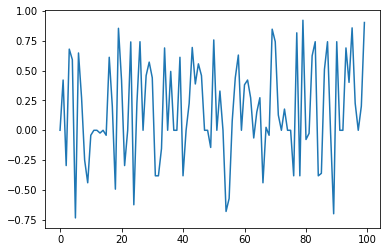

In [49]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')
df["sentiment_score"].plot()
plt.show()